# Download the data and create DataFrame


In [55]:
import warnings
warnings.filterwarnings("ignore")

In [137]:
# import all dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import session
from sqlalchemy import create_engine, func
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [2]:
# Import the data into Jupyter Notebook 
anthro_df = pd.read_csv('../AN_EW_CUST_DATASET_202303141449.csv')
anthro_df.head()

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,LOYALTY_ENROLLMENT_DT,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,...,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
0,010TUGIXZ95K5R,57,8,K,0.0,85260.0,Y,00:00.0,3/24/2015,5059.97,...,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46
1,0109BPMLXNREXT,50,7,J,306.0,20017.0,Y,00:00.0,10/15/2015,17353.28,...,ANT DIRECT SELLING (NA),NaN,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96
2,0102I4L0PINZB3,54,11,E,1129.0,23233.0,Y,00:00.0,7/11/2017,4481.17,...,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97
3,010QS307CAT5WJ,48,11,K,204.0,23453.0,Y,00:00.0,6/28/2018,8312.67,...,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00
4,0101EN5Q3W4AE8,32,9,K,0.0,94108.0,Y,00:00.0,7/12/2019,6528.04,...,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00


# Clean DataFrame and prep for analysis

In [3]:
# print column names
print(anthro_df.columns.values.tolist())

['IID', 'AGE_', 'INCOME', 'ETHNIC_CODE_GROUP', 'AN_BIRTHDAY', 'POSTAL_CD', 'LOYALTY_YN', 'LOYALTY_ENROLLMENT_DT', 'FIRST_ANTHRO_ORDER', 'LIFETIME_APPAREL_DEMAND', 'LIFETIME_APPAREL_ORDERS', 'ORDER_DT', 'ORDER_ID', 'ORDER_LINE_SEQ', 'PURCHASE_CHANNEL_DERIVED', 'STORE_NUM', 'STORE_NAME', 'STORE_ZIP', 'DIVISION_NAME', 'DEPARTMENT_NAME', 'CLASS_NAME', 'PRODUCT_ID', 'ITEM_NAME', 'MD_STATE', 'DEMAND_QTY', 'DEMAND_AMT']


In [4]:
anthro_df

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,LOYALTY_ENROLLMENT_DT,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,...,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
0,010TUGIXZ95K5R,57,8,K,0.0,85260.0,Y,00:00.0,3/24/2015,5059.97,...,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46
1,0109BPMLXNREXT,50,7,J,306.0,20017.0,Y,00:00.0,10/15/2015,17353.28,...,ANT DIRECT SELLING (NA),NaN,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96
2,0102I4L0PINZB3,54,11,E,1129.0,23233.0,Y,00:00.0,7/11/2017,4481.17,...,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97
3,010QS307CAT5WJ,48,11,K,204.0,23453.0,Y,00:00.0,6/28/2018,8312.67,...,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00
4,0101EN5Q3W4AE8,32,9,K,0.0,94108.0,Y,00:00.0,7/12/2019,6528.04,...,ANT DIRECT SELLING (NA),NaN,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284136,010NNJ93E7VKUN,49,7,K,0.0,60067.0,Y,00:00.0,10/9/2017,464042.36,...,ANT DIRECT SELLING (NA),NaN,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),57043523,MD SILK BALLOON LEG JUMPS,REG PRICE,1,52.46
284137,010SLK1GNREM3J,33,10,K,0.0,41011.0,N,NaN,8/21/2020,317.00,...,579 LEXINGTON KY MALL L.G (NA),40517-8307,JEWELRY & ACCESSORIES (NA),ANTHRO. WOMEN'S ACCESS. (NA),LAYERS - ANTHRO (NA),57964884,KIMONO BLNK TINOPI VELVET,REG PRICE,1,110.40
284138,010V919PG0U0CI,43,11,C,305.0,2790.0,Y,00:00.0,7/20/2017,39978.66,...,ANT DIRECT SELLING (NA),NaN,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S TOPS (NA),CUT AND SEW KNITS-ANTHRO (NA),57214033,OB VERSATILE CUPRO WRAP T,REG PRICE,1,54.40
284139,0103MCQ331KBWY,56,10,K,0.0,37803.0,Y,00:00.0,5/4/2016,4860.19,...,"498 CARMEL, CA (NA)",93923-0000,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S DRESSES (NA),DRESSES - ANTHRO. (NA),67516989,OB BARE HLTR NCK PRNTD TI,MARKDOWN,1,148.00


In [5]:
# check for null values
nan_in_df = anthro_df.isnull().sum().sum()
 
# printing the number of values present in the whole dataframe
print('Number of NaN values present: ' + str(nan_in_df))

Number of NaN values present: 233211


In [6]:
# replace blank zipcode fields for direct sales with "DIRECT"
# modifiedDf=anthro_df.fillna("NaN") # Replace empty/null values with "NaN"
anthro_df['STORE_ZIP'] = anthro_df['STORE_ZIP'].fillna("DIRECT").copy()
anthro_df

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,LOYALTY_ENROLLMENT_DT,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,...,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
0,010TUGIXZ95K5R,57,8,K,0.0,85260.0,Y,00:00.0,3/24/2015,5059.97,...,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46
1,0109BPMLXNREXT,50,7,J,306.0,20017.0,Y,00:00.0,10/15/2015,17353.28,...,ANT DIRECT SELLING (NA),DIRECT,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96
2,0102I4L0PINZB3,54,11,E,1129.0,23233.0,Y,00:00.0,7/11/2017,4481.17,...,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97
3,010QS307CAT5WJ,48,11,K,204.0,23453.0,Y,00:00.0,6/28/2018,8312.67,...,ANT DIRECT SELLING (NA),DIRECT,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00
4,0101EN5Q3W4AE8,32,9,K,0.0,94108.0,Y,00:00.0,7/12/2019,6528.04,...,ANT DIRECT SELLING (NA),DIRECT,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284136,010NNJ93E7VKUN,49,7,K,0.0,60067.0,Y,00:00.0,10/9/2017,464042.36,...,ANT DIRECT SELLING (NA),DIRECT,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),57043523,MD SILK BALLOON LEG JUMPS,REG PRICE,1,52.46
284137,010SLK1GNREM3J,33,10,K,0.0,41011.0,N,NaN,8/21/2020,317.00,...,579 LEXINGTON KY MALL L.G (NA),40517-8307,JEWELRY & ACCESSORIES (NA),ANTHRO. WOMEN'S ACCESS. (NA),LAYERS - ANTHRO (NA),57964884,KIMONO BLNK TINOPI VELVET,REG PRICE,1,110.40
284138,010V919PG0U0CI,43,11,C,305.0,2790.0,Y,00:00.0,7/20/2017,39978.66,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S TOPS (NA),CUT AND SEW KNITS-ANTHRO (NA),57214033,OB VERSATILE CUPRO WRAP T,REG PRICE,1,54.40
284139,0103MCQ331KBWY,56,10,K,0.0,37803.0,Y,00:00.0,5/4/2016,4860.19,...,"498 CARMEL, CA (NA)",93923-0000,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S DRESSES (NA),DRESSES - ANTHRO. (NA),67516989,OB BARE HLTR NCK PRNTD TI,MARKDOWN,1,148.00


In [7]:
# check for null values
nan_in_df = anthro_df.isnull().sum().sum()
 
# printing the number of values present in the whole dataframe
print('Number of NaN values present: ' + str(nan_in_df))

Number of NaN values present: 66777


In [9]:
# create a pivot table to summarize sales by purchase channel
pivot = anthro_df.pivot_table(index =['PURCHASE_CHANNEL_DERIVED'], 
                       values =['IID'], 
                       aggfunc ='count')
print(pivot)

                             IID
PURCHASE_CHANNEL_DERIVED        
DIRECT                    166434
RETAIL                    117707


In [10]:
anthro_df.dropna(how='any', inplace=True)  

In [11]:
anthro_df

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,LOYALTY_ENROLLMENT_DT,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,...,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
0,010TUGIXZ95K5R,57,8,K,0.0,85260.0,Y,00:00.0,3/24/2015,5059.97,...,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46
1,0109BPMLXNREXT,50,7,J,306.0,20017.0,Y,00:00.0,10/15/2015,17353.28,...,ANT DIRECT SELLING (NA),DIRECT,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96
2,0102I4L0PINZB3,54,11,E,1129.0,23233.0,Y,00:00.0,7/11/2017,4481.17,...,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97
3,010QS307CAT5WJ,48,11,K,204.0,23453.0,Y,00:00.0,6/28/2018,8312.67,...,ANT DIRECT SELLING (NA),DIRECT,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00
4,0101EN5Q3W4AE8,32,9,K,0.0,94108.0,Y,00:00.0,7/12/2019,6528.04,...,ANT DIRECT SELLING (NA),DIRECT,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284133,010TPQOHLPTWWR,58,7,Z,807.0,33418.0,Y,00:00.0,7/2/2020,20813.14,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),SETS (NA),SETS (NA),63732754,2 PC SS TWIST FRNT KNIT S,MARKDOWN,1,29.95
284135,0111V435Q3LXTW,60,6,K,0.0,28557.0,Y,00:00.0,2/18/2015,15095.59,...,"444 RICHMOND, VA (NA)",23235-1955,JEWELRY & ACCESSORIES (NA),ANTHRO. WOMEN'S ACCESS. (NA),HATS 4152 (NA),60770062,BOATER ANTH PAPER,MARKDOWN,1,68.00
284136,010NNJ93E7VKUN,49,7,K,0.0,60067.0,Y,00:00.0,10/9/2017,464042.36,...,ANT DIRECT SELLING (NA),DIRECT,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),57043523,MD SILK BALLOON LEG JUMPS,REG PRICE,1,52.46
284138,010V919PG0U0CI,43,11,C,305.0,2790.0,Y,00:00.0,7/20/2017,39978.66,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S TOPS (NA),CUT AND SEW KNITS-ANTHRO (NA),57214033,OB VERSATILE CUPRO WRAP T,REG PRICE,1,54.40


In [12]:
# create a pivot table to summarize sales by purchase channel
pivot = anthro_df.pivot_table(index =['PURCHASE_CHANNEL_DERIVED'], 
                       values =['IID'], 
                       aggfunc ='count')
print(pivot)

                             IID
PURCHASE_CHANNEL_DERIVED        
DIRECT                    132754
RETAIL                     91893


In [13]:
# check for null values
nan_in_df = anthro_df.isnull().sum().sum()
 
# printing the number of values present in the whole dataframe
print('Number of NaN values present: ' + str(nan_in_df))

Number of NaN values present: 0


In [14]:
# check data types
anthro_df.dtypes

IID                          object
AGE_                          int64
INCOME                        int64
ETHNIC_CODE_GROUP            object
AN_BIRTHDAY                 float64
POSTAL_CD                   float64
LOYALTY_YN                   object
LOYALTY_ENROLLMENT_DT        object
FIRST_ANTHRO_ORDER           object
LIFETIME_APPAREL_DEMAND     float64
LIFETIME_APPAREL_ORDERS       int64
ORDER_DT                     object
ORDER_ID                     object
ORDER_LINE_SEQ                int64
PURCHASE_CHANNEL_DERIVED     object
STORE_NUM                     int64
STORE_NAME                   object
STORE_ZIP                    object
DIVISION_NAME                object
DEPARTMENT_NAME              object
CLASS_NAME                   object
PRODUCT_ID                    int64
ITEM_NAME                    object
MD_STATE                     object
DEMAND_QTY                    int64
DEMAND_AMT                  float64
dtype: object

In [15]:
# convert the 'AN_BIRTHDAY', 'LOYALTY_ENROLLMENT_DT', 'FIRST_ANTHRO_ORDER', 'ORDER_DT' columns to datetime format
anthro_df['ORDER_DT']= pd.to_datetime(anthro_df['ORDER_DT'])
anthro_df['FIRST_ANTHRO_ORDER']= pd.to_datetime(anthro_df['FIRST_ANTHRO_ORDER'])
anthro_df['AN_BIRTHDAY']= pd.to_datetime(anthro_df['AN_BIRTHDAY'])

# Check the format of 'Date' columns
anthro_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224647 entries, 0 to 284139
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   IID                       224647 non-null  object        
 1   AGE_                      224647 non-null  int64         
 2   INCOME                    224647 non-null  int64         
 3   ETHNIC_CODE_GROUP         224647 non-null  object        
 4   AN_BIRTHDAY               224647 non-null  datetime64[ns]
 5   POSTAL_CD                 224647 non-null  float64       
 6   LOYALTY_YN                224647 non-null  object        
 7   LOYALTY_ENROLLMENT_DT     224647 non-null  object        
 8   FIRST_ANTHRO_ORDER        224647 non-null  datetime64[ns]
 9   LIFETIME_APPAREL_DEMAND   224647 non-null  float64       
 10  LIFETIME_APPAREL_ORDERS   224647 non-null  int64         
 11  ORDER_DT                  224647 non-null  datetime64[ns]
 12  OR

In [17]:
# drop loyalty enrollment date column since there are only 875 rows with values  
anthro_df = anthro_df.drop('LOYALTY_ENROLLMENT_DT', axis=1).copy()

anthro_df

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,LIFETIME_APPAREL_ORDERS,...,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
0,010TUGIXZ95K5R,57,8,K,1970-01-01 00:00:00.000000000,85260.0,Y,2015-03-24,5059.97,67,...,"423 SCOTTSDALE,AZ-KIERLND (NA)",85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46
1,0109BPMLXNREXT,50,7,J,1970-01-01 00:00:00.000000306,20017.0,Y,2015-10-15,17353.28,54,...,ANT DIRECT SELLING (NA),DIRECT,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96
2,0102I4L0PINZB3,54,11,E,1970-01-01 00:00:00.000001129,23233.0,Y,2017-07-11,4481.17,30,...,"444 RICHMOND, VA (NA)",23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97
3,010QS307CAT5WJ,48,11,K,1970-01-01 00:00:00.000000204,23453.0,Y,2018-06-28,8312.67,47,...,ANT DIRECT SELLING (NA),DIRECT,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00
4,0101EN5Q3W4AE8,32,9,K,1970-01-01 00:00:00.000000000,94108.0,Y,2019-07-12,6528.04,37,...,ANT DIRECT SELLING (NA),DIRECT,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284133,010TPQOHLPTWWR,58,7,Z,1970-01-01 00:00:00.000000807,33418.0,Y,2020-07-02,20813.14,745,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),SETS (NA),SETS (NA),63732754,2 PC SS TWIST FRNT KNIT S,MARKDOWN,1,29.95
284135,0111V435Q3LXTW,60,6,K,1970-01-01 00:00:00.000000000,28557.0,Y,2015-02-18,15095.59,134,...,"444 RICHMOND, VA (NA)",23235-1955,JEWELRY & ACCESSORIES (NA),ANTHRO. WOMEN'S ACCESS. (NA),HATS 4152 (NA),60770062,BOATER ANTH PAPER,MARKDOWN,1,68.00
284136,010NNJ93E7VKUN,49,7,K,1970-01-01 00:00:00.000000000,60067.0,Y,2017-10-09,464042.36,2896,...,ANT DIRECT SELLING (NA),DIRECT,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),57043523,MD SILK BALLOON LEG JUMPS,REG PRICE,1,52.46
284138,010V919PG0U0CI,43,11,C,1970-01-01 00:00:00.000000305,2790.0,Y,2017-07-20,39978.66,287,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S TOPS (NA),CUT AND SEW KNITS-ANTHRO (NA),57214033,OB VERSATILE CUPRO WRAP T,REG PRICE,1,54.40


In [47]:
age_bins = [0,30,40,50,60,70,80]
age_labels = ['< 30', '31-40', '41-50', '51-60', '61-70', '80+']
anthro_df['AGE_BUCKETS'] = pd.cut(anthro_df['AGE_'],bins = age_bins, labels = age_labels)

In [56]:
avg_ltd_per_bucket = anthro_df.groupby('AGE_BUCKETS').mean()['LIFETIME_APPAREL_DEMAND']

In [62]:
age_bins = [0,30,40,50,60,70,80, 100]
age_labels = ['< 30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
low_demand_df['AGE_BUCKETS'] = pd.cut(low_demand_df['AGE_'],bins = age_bins, labels = age_labels)

In [63]:
avg_ltd_per_bucket_low = low_demand_df.groupby('AGE_BUCKETS').mean()['LIFETIME_APPAREL_DEMAND']

In [67]:
sum_ltd_per_bucket_low = low_demand_df.groupby('AGE_BUCKETS').sum()['LIFETIME_APPAREL_DEMAND']

In [18]:
# create a pivot table to summarize sales by ethnicity
pivot = anthro_df.pivot_table(index =['ETHNIC_CODE_GROUP'], 
                       values =['IID'], 
                       aggfunc ='count')
print(pivot)

                      IID
ETHNIC_CODE_GROUP        
A                    9710
B                    9466
C                    6109
D                     598
E                   26470
F                     108
G                    5466
H                       3
I                    1729
J                    4789
K                  144753
L                    8560
M                      37
Z                    6849


In [19]:
# create a pivot table to summarize sales by age
pivot = anthro_df.pivot_table(index =['AGE_'], 
                       values =['LIFETIME_APPAREL_DEMAND'], 
                       aggfunc ='sum')
print(pivot)

      LIFETIME_APPAREL_DEMAND
AGE_                         
18                    1241.52
19                  786020.82
20                 2600791.56
21                  387260.30
22                 1511761.61
...                       ...
91                 1974687.01
93                   19048.05
95                   16312.66
98                  213764.51
99                   12991.56

[77 rows x 1 columns]


In [33]:
# filter to large customers only
high_demand_df = anthro_df.loc[anthro_df['LIFETIME_APPAREL_DEMAND'] > 100000]
high_demand_df

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,LIFETIME_APPAREL_ORDERS,...,STORE_NAME,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT
9,010EF2O2JTXADL,44,4,K,1970-01-01 00:00:00.000000505,54720.0,Y,2015-02-25,207190.78,255,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S DRESSES (NA),DRESSES - ANTHRO. (NA),68433762,BLACK HALO SLIM ONE SHOUL,MARKDOWN,1,375.00
10,010EF2O2JTXADL,44,4,K,1970-01-01 00:00:00.000000505,54720.0,Y,2015-02-25,207190.78,255,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S DRESSES (NA),DRESSES - ANTHRO. (NA),69773133,OB OS TXTRD RFFL MINI,MARKDOWN,1,170.00
38,010EF2O2JTXADL,44,4,K,1970-01-01 00:00:00.000000505,54720.0,Y,2015-02-25,207190.78,255,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S TOPS (NA),SWEATERS - ANTHRO. (NA),69916096,ANTIK BATIK STRIPED TURTL,REG PRICE,1,99.97
123,010EF2O2JTXADL,44,4,K,1970-01-01 00:00:00.000000505,54720.0,Y,2015-02-25,207190.78,255,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S DRESSES (NA),DRESSES - ANTHRO. (NA),64665839,FAITHFULL SV DEEP V SOLID,MARKDOWN,1,199.00
125,010P86L54YFI9B,59,7,K,1970-01-01 00:00:00.000001102,28210.0,Y,2015-04-04,143086.44,532,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S TOPS (NA),BLOUSES - ANTHRO. (NA),69627446,OB LL MAEVE FEMME SHIRT,MARKDOWN,1,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284045,010EAXG020328O,40,11,K,1970-01-01 00:00:00.000000000,59715.0,Y,2015-02-01,234667.27,1992,...,ANT DIRECT SELLING (NA),DIRECT,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),INTIMATES - ANTHRO (NA),59618850,LOVE STORIES UMA VELVET B,MARKDOWN,1,70.00
284047,010NNJ93E7VKUN,49,7,K,1970-01-01 00:00:00.000000000,60067.0,Y,2017-10-09,464042.36,2896,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),65199101,OB PILCRO LONGLINE SWEATE,REG PRICE,1,149.97
284071,010EAXG020328O,40,11,K,1970-01-01 00:00:00.000000000,59715.0,Y,2015-02-01,234667.27,1992,...,ANT DIRECT SELLING (NA),DIRECT,JEWELRY & ACCESSORIES (NA),ANTHRO. WOMEN'S SHOES (NA),FLATS - ANTHRO. (NA),66017666,FL ALL BLACK LINK LUGG,MARKDOWN,1,139.95
284105,010P86L54YFI9B,59,7,K,1970-01-01 00:00:00.000001102,28210.0,Y,2015-04-04,143086.44,532,...,ANT DIRECT SELLING (NA),DIRECT,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S TOPS (NA),CUT AND SEW KNITS-ANTHRO (NA),61416798,OB SPLIT NECK SLIM TEE,MARKDOWN,1,48.00


In [46]:
# create a pivot table to summarize sales by age
high_pivot = high_demand_df.pivot_table(index =['AGE_'], 
                       values =['LIFETIME_APPAREL_DEMAND'], 
                       aggfunc ='sum')
high_pivot

,LIFETIME_APPAREL_DEMAND
AGE_,
40,3.708009e+08
41,4.063530e+08
44,2.229373e+08
45,4.692807e+07
49,4.085429e+09
55,3.475408e+07
59,9.572483e+07
74,7.021068e+07


In [70]:
# filter to lower dollar amount customers only
low_demand_df = anthro_df.loc[anthro_df['LIFETIME_APPAREL_DEMAND'] < 100000]
low_demand_df.head()

,IID,AGE_,INCOME,ETHNIC_CODE_GROUP,AN_BIRTHDAY,POSTAL_CD,LOYALTY_YN,FIRST_ANTHRO_ORDER,LIFETIME_APPAREL_DEMAND,LIFETIME_APPAREL_ORDERS,...,STORE_ZIP,DIVISION_NAME,DEPARTMENT_NAME,CLASS_NAME,PRODUCT_ID,ITEM_NAME,MD_STATE,DEMAND_QTY,DEMAND_AMT,AGE_BUCKETS
0,010TUGIXZ95K5R,57,8,K,1970-01-01 00:00:00.000000000,85260.0,Y,2015-03-24,5059.97,67,...,85254-2176,ANTHRO. WOMEN'S DIVISION (NA),ANTHRO. WOMEN'S BOTTOMS (NA),PANTS (NA),54766134,ASYMMETRICAL PULL ON PANT,REG PRICE,1,52.46,51-60
1,0109BPMLXNREXT,50,7,J,1970-01-01 00:00:00.000000306,20017.0,Y,2015-10-15,17353.28,54,...,DIRECT,OFF HOURS (NA),ANTHRO - OFF HOURS (NA),LOUNGE (NA),59001933,COZY KNIT JOGGER,REG PRICE,1,44.96,41-50
2,0102I4L0PINZB3,54,11,E,1970-01-01 00:00:00.000001129,23233.0,Y,2017-07-11,4481.17,30,...,23235-1955,ANTHRO. WOMEN'S DIVISION (NA),JACKETS (NA),OUTERWEAR - ANTHRO. (NA),69997476,UNREAL FUR KATHMANDU COAT,REG PRICE,1,179.97,51-60
3,010QS307CAT5WJ,48,11,K,1970-01-01 00:00:00.000000204,23453.0,Y,2018-06-28,8312.67,47,...,DIRECT,APPAREL EXTENDED SIZES (NA),PETITES (NA),JEANS - PETITES (NA),58280181,OB HR FEMME DARTED SKINNY,MARKDOWN,1,128.00,41-50
4,0101EN5Q3W4AE8,32,9,K,1970-01-01 00:00:00.000000000,94108.0,Y,2019-07-12,6528.04,37,...,DIRECT,APPAREL EXTENDED SIZES (NA),PETITES (NA),DRESSES - PETITES (NA),66952177,OB 1 SHLDR CHERRY PRNTD M,MARKDOWN,1,160.00,31-40


In [42]:
# export csv
# anthro_df.to_csv('test.csv')

# Show summary stats and matplotlib images for age group purchases

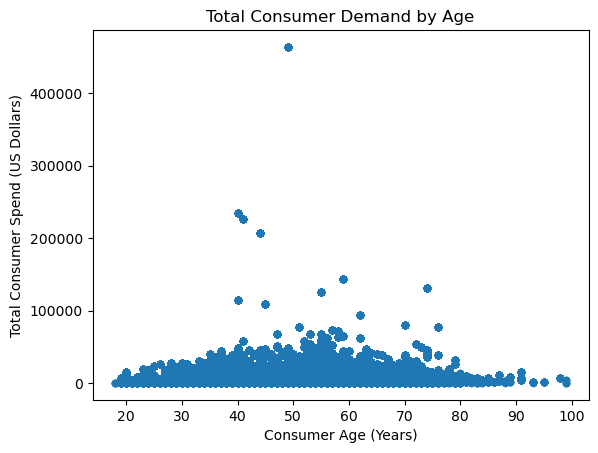

In [130]:
# plot all ages / sales data
anthro_df.plot(x="AGE_", y=['LIFETIME_APPAREL_DEMAND'], kind="scatter")
plt.xlabel('Customer Age (Years)')
plt.ylabel('Total Customer Spend (US Dollars)')
plt.title('Total Customer Demand by Age')
plt.show()

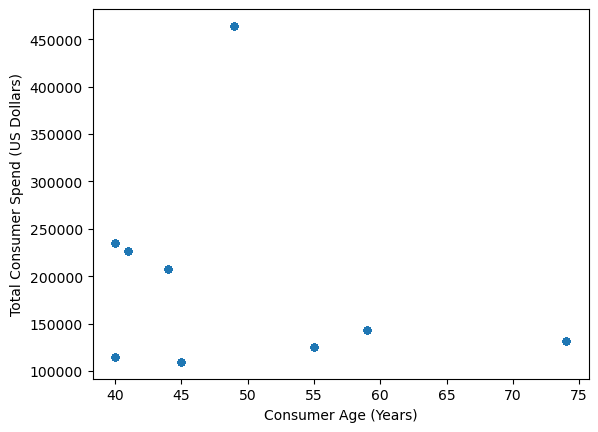

In [142]:
# plot high demand ages / sales data
high_demand_df.plot(x="AGE_", y=['LIFETIME_APPAREL_DEMAND'], kind="scatter")
plt.xlabel('Customer Age (Years)')
plt.ylabel('Total Customer Spend (US Dollars)')
plt.show()

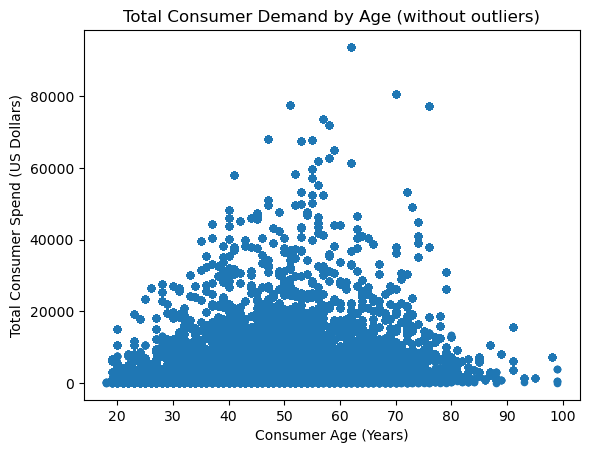

In [133]:
# plot low demand ages / sales data
low_demand_df.plot(x="AGE_", y=['LIFETIME_APPAREL_DEMAND'], kind="scatter")
plt.xlabel('Customer Age (Years)')
plt.ylabel('Total Customer Spend (US Dollars)')
plt.title('Total Customer Demand by Age (without outliers)')
plt.show()

<AxesSubplot: xlabel='AGE_BUCKETS'>

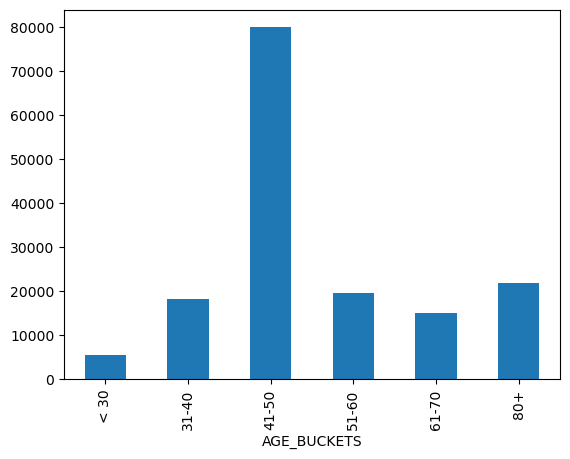

In [51]:
avg_ltd_per_bucket.plot(kind = 'bar')

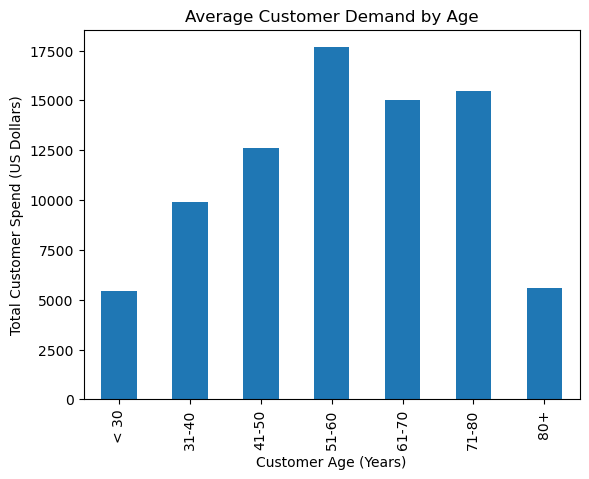

<Figure size 640x480 with 0 Axes>

In [144]:
avg_ltd_per_bucket_low.plot(kind = 'bar')
plt.xlabel('Customer Age (Years)')
plt.ylabel('Total Customer Spend (US Dollars)')
plt.title('Average Customer Demand by Age')
plt.show()
plt.savefig('avg_low_demand_per_bucket.png')

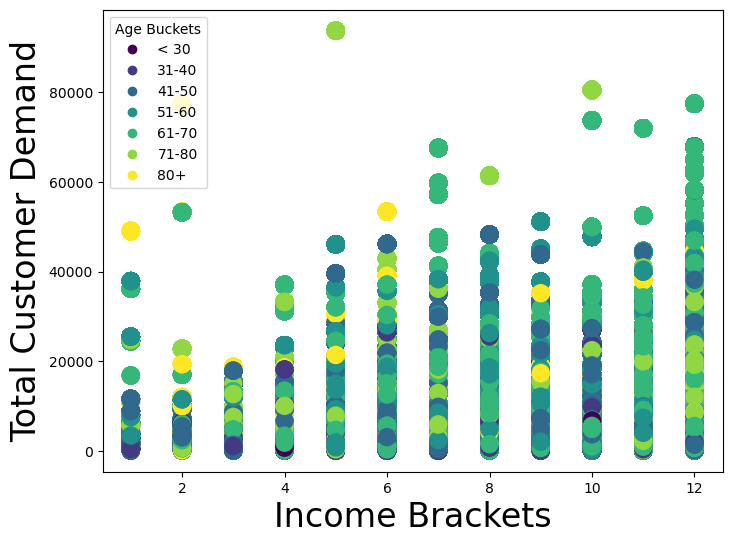

In [71]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(low_demand_df.INCOME, 
            low_demand_df.LIFETIME_APPAREL_DEMAND,
            s=150,
            c=low_demand_df.AGE_BUCKETS.astype('category').cat.codes)
plt.xlabel("Income Brackets", size=24)
plt.ylabel("Total Customer Demand", size=24)
# add legend to the plot with names
plt.legend(handles=scatter.legend_elements()[0], 
           labels= age_labels,
           title="Age Buckets")
# plt.savefig("scatterplot_colored_by_variable_with_legend_matplotlib_Python.png",
#                     format='png',dpi=150)
plt.show()


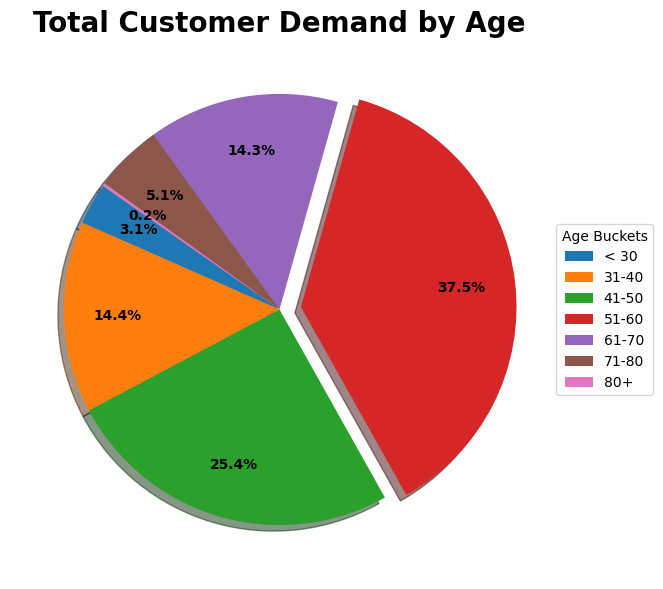

In [128]:
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))
explode = (0, 0,0,.1,0,0,0)
wedges, texts, autotexts = ax.pie(sum_ltd_per_bucket_low.values, autopct='%1.1f%%', explode = explode, pctdistance=0.75, shadow =True, startangle=145)

ax.legend(wedges, age_labels,
          title="Age Buckets",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Total Customer Demand by Age", size = 20, weight = "bold")

plt.show()

# Create tables for each age / gender group to be imported into pgAdmin

# Create ERD with QuickDBD for all tables

# Run an elbow curve and a K-means model based on the elbow curve on the transformed data to have an idea about the possible clustering that exists in the data

In [ ]:
# # Use get_dummies() to create variables for text features.
# X = pd.get_dummies(data = anthro_df, columns = ['AGE_', 'LIFETIME_APPAREL_DEMAND'])
# X

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[0:5]

In [ ]:
# Initialize PCA model
pca = PCA(n_components=3, random_state=0)

X_pca = pca.fit_transform(X_scaled)
X_pca

In [ ]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(data = X_pca, columns = ['Age Group 1', 'Age Group 2', 'Age Group 3'])

pcs_df = pcs_df.set_index(group_df.index)
pcs_df

In [ ]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

In [ ]:
# Define a DataFrame to plot the Elbow Curve using hvPlot
# Create an elbow curve to find the best value for K.
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

In [ ]:
# Initializing model  k=4
model = KMeans(n_clusters=4, random_state=0)

# fir the model
model.fit(pcs_df)

# get predictions
predictions = model.predict(pcs_df)
predictions

In [ ]:
clustered_df = pd.concat([group_df, pcs_df], axis = 1)


print(clustered_df.shape)
clustered_df.head(10)

In [ ]:
#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["class"] = model.labels_

print(clustered_df.shape)
clustered_df.head(10)

In [ ]:
# Plot the 3D-scatter 
fig = px.scatter_3d(
    clustered_df,
    x="Age Group 1",
    y="Age Group 2",
    z="Age Group 3",
    color="class",
    symbol="class",
    width=800,
    hover_name='Age',
    hover_data=['Algorithm'],
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [ ]:
clustered_df.hvplot.table(columns=['', ''], sortable=True, selectable=True)


# Add a machine learning model, including a confusion matrix and accuracy score

### Create new DataFrame with aggregate features and only important features

In [ ]:
# aggregate features from original DF:  first order date, percent of orders online
# min, max, median, mean for quantity and dollars


In [ ]:
# new DF with only most recent value for age, lifetime demand, income, ethnic code, loyalty y/n

In [ ]:
# remove:  birthday, postal code, first anthro order, order date, order id, order line, purchase channel, 
# all store columns, department name, class name, id name, demand, demand amt, loyalty enrollment date

### Establish the target and features

In [134]:
# set the target column
target_df = anthro_df.loc[:, ['LIFETIME_APPAREL_DEMAND'] ].copy()

# drop the target column from the features
features_df = anthro_df.drop('LIFETIME_APPAREL_DEMAND', axis = 1)

### Split the data into training and testing

In [135]:
# Create our features
X = features_df.copy()
X.head()

# Create our target
y = target_df.copy()
y[:5]

,LIFETIME_APPAREL_DEMAND
0,5059.97
1,17353.28
2,4481.17
3,8312.67
4,6528.04


In [136]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Create a Random Forest Regression

In [ ]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train) 

In [ ]:
y_pred = regressor.predict(X_test)  # test the output by changing values

In [ ]:
# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01
# between two consecutive values
X_grid = np.arrange(min(x), max(x), 0.01)
 
# reshape for reshaping the data into a len(X_grid)*1 array,
# i.e. to make a column out of the X_grid value                 
X_grid = X_grid.reshape((len(X_grid), 1))
 
# Scatter plot for original data
plt.scatter(x, y, color = 'blue') 
 
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),
         color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

### Evaluate the model

In [ ]:
# sklearn has ways to calculate these:  
# Mean Absolute Error(MAE) - lower the error the better



In [ ]:
# Mean Squared Error(MSE) - lower the error the better


In [ ]:
# r-squared - the higher the better (better fit)


# Check feature importance to see which features affect purchasing scores the most

In [ ]:
feature_names = X.columns
sorted_df = sorted(zip(rf_model.feature_importances_, feature_names), reverse=True)
sorted_df

In [ ]:
for x in sorted_df:
    print(f'{x[1]}: ({x[0]})')